In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('./dataset/zgpa_train.csv')
print("data shape: ", data.shape)

data.head()


data shape:  (731, 6)


,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [3]:
price = data.loc[:, "close"]
price.head()

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
Name: close, dtype: float64

In [4]:
# normalize
price_max = max(price)
price_norm = price / price_max

print(price_norm)

0      0.383273
1      0.389266
2      0.389666
3      0.379545
4      0.381808
         ...   
726    0.751099
727    0.750566
728    0.738447
729    0.733120
730    0.722466
Name: close, Length: 731, dtype: float64


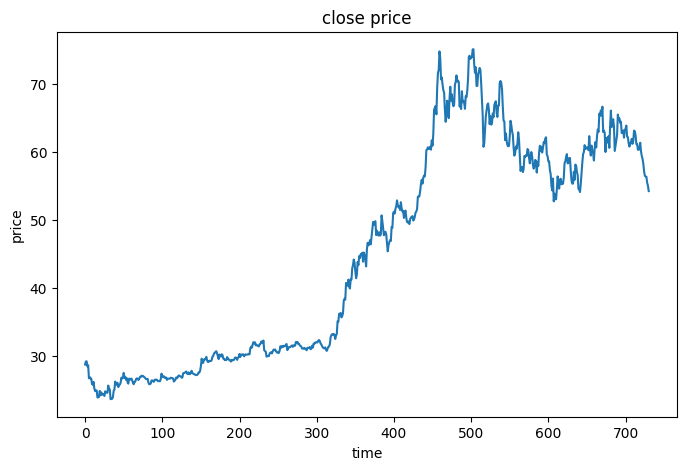

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.plot(price)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [6]:
def extract_data(data, time_step):
    X = []
    y = []
    # 0,1,2,3...9:10个样本；time_step=8;0,1...7;1,2...8;2,3...9三组（两组样本）
    for i in range(len(data) - time_step):
        X.append([a for a in data[i : i + time_step]])
        y.append(data[i + time_step])
    X = np.array(X)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return X, y

In [7]:
time_step = 8

In [8]:
# define X and y
X, y = extract_data(price_norm, time_step)


In [9]:
print(X[0, :, :])

[[0.38327341]
 [0.38926621]
 [0.38966573]
 [0.37954455]
 [0.3818085 ]
 [0.35637235]
 [0.35876948]
 [0.35583966]]


In [10]:
print(y)

[0.3558396590757757, 0.3453189505926222, 0.3435876947662805, 0.34944732987082167, 0.33639632441070716, 0.33133573045678516, 0.3322679451325076, 0.33280063923292047, 0.3190837661472899, 0.31895059262218667, 0.32001598082301236, 0.3317352510320948, 0.3230789719003862, 0.3289386070049274, 0.3245438806765215, 0.325476095352244, 0.3248102277267279, 0.3217472366493541, 0.33093620988147554, 0.32987082168064985, 0.32813956585430815, 0.3282727393794113, 0.34225595951524834, 0.33599680383539754, 0.3347982421094686, 0.31548808096950326, 0.31735251032094813, 0.3161539485950193, 0.3194832867225995, 0.3317352510320948, 0.334398721534159, 0.3499800239712345, 0.34332134771607403, 0.34665068584365427, 0.34771607404447996, 0.3391929684378745, 0.3431881741909708, 0.34412038886669327, 0.3474497269942735, 0.3577040884272206, 0.3559728326008789, 0.35757091490211745, 0.36702623518444527, 0.357304567851911, 0.3594353442535623, 0.35330936209881475, 0.35677187375149816, 0.34878146224530565, 0.3459848182181382, 

In [11]:
print(X.shape, len(y))

(723, 8, 1) 723


In [12]:
# set up the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

mlp = Sequential()
# add RNN layer
mlp.add(SimpleRNN(units=5, input_shape=(time_step, 1), activation="relu"))
# add output layer
mlp.add(Dense(units=1, activation="linear"))
# configure the model
mlp.compile(optimizer="adam", loss="mean_squared_error")
mlp.summary()

c:\Users\WindW\anaconda3\envs\ai_basic\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# train the model
mlp.fit(X, y, batch_size=30, epochs=200)

IndexError: tuple index out of range

In [ ]:
# make prediction based on the training data
y_train_predict = mlp.predict(X) * max(price)
y_train = [i * max(price) for i in y]
print(y_train_predict, y_train)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[18.616287]
 [20.51609 ]
 [17.159225]
 [19.820639]
 [17.819677]
 [18.639027]
 [18.379154]
 [18.154837]
 [18.317995]
 [16.930723]
 [18.342375]
 [16.776796]
 [18.732714]
 [17.087685]
 [19.346983]
 [16.870543]
 [19.348255]
 [17.609186]
 [19.080397]
 [18.141232]
 [18.569511]
 [18.574621]
 [18.290401]
 [19.936728]
 [18.224464]
 [19.959234]
 [16.939379]
 [18.979662]
 [16.587933]
 [19.006561]
 [17.427036]
 [18.768572]
 [19.319448]
 [19.102991]
 [20.938234]
 [19.433006]
 [20.553793]
 [19.406076]
 [19.961498]
 [19.510492]
 [20.015072]
 [20.15091 ]
 [20.170425]
 [21.064528]
 [20.333237]
 [20.969233]
 [19.868917]
 [20.84851 ]
 [18.66742 ]
 [20.4197  ]
 [19.076729]
 [19.841593]
 [19.72615 ]
 [19.890493]
 [19.88309 ]
 [19.276066]
 [19.922256]
 [19.566221]
 [19.407572]
 [20.067192]
 [19.610876]
 [20.14358 ]
 [19.716469]
 [20.558327]
 [20.215536]
 [20.446856]
 [20.47903 ]
 [20.22826 ]
 [20.526497]
 [20.193861]
 [20.582916]
 [19.890411]
 [20.137413]
 [19.776993]

<Figure size 800x500 with 0 Axes>

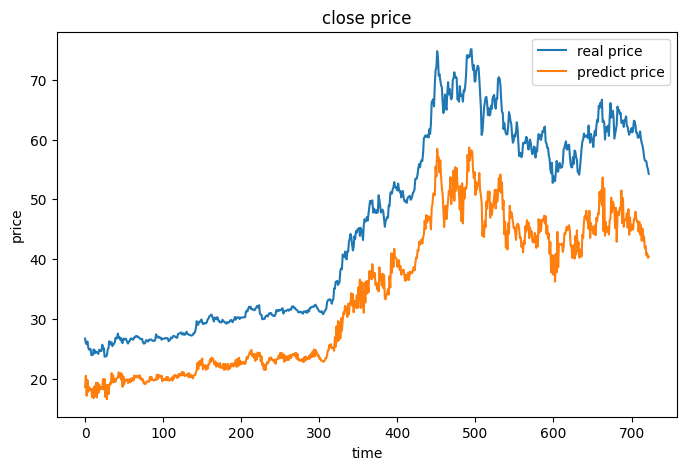

In [ ]:
fig2 = plt.figure(figsize=(8, 5))
plt.plot(y_train, label="real price")
plt.plot(y_train_predict, label="predict price")
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

In [ ]:
data_test = pd.read_csv("./dataset/zgpa_test.csv")
data_test.head()
price_test = data_test.loc[:, "close"]
price_test.head()
price_test_norm = price_test / max(price)
# extract X_test and y_test
X_test_norm, y_test_norm = extract_data(price_test_norm, time_step)
print(X_test_norm.shape, len(y_test_norm))

(174, 8, 1) 174


In [ ]:
# make prediction based on the test data
y_test_predict = mlp.predict(X_test_norm) * max(price)
y_test = [i * max(price) for i in y_test_norm]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


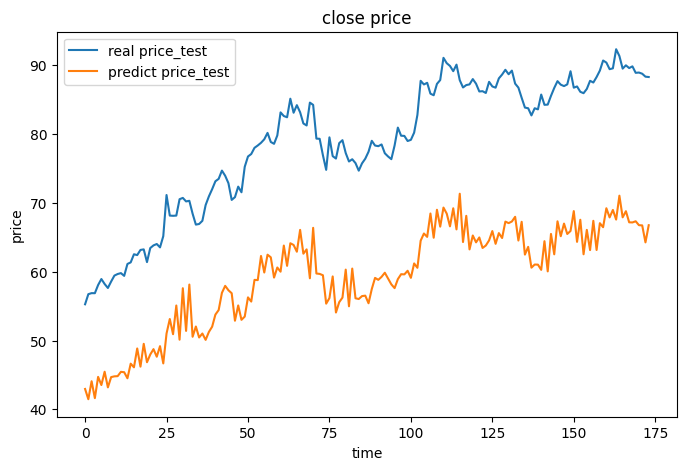

In [ ]:
fig3 = plt.figure(figsize=(8, 5))
plt.plot(y_test, label="real price_test")
plt.plot(y_test_predict, label="predict price_test")
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

In [ ]:
result_y_test = np.array(y_test).reshape(-1, 1)
result_y_test_predict = y_test_predict
print(result_y_test.shape, result_y_test_predict.shape)
result = np.concatenate((result_y_test, result_y_test_predict), axis=1)
print(result.shape)
result = pd.DataFrame(result, columns=["real_price_test", "predict_price_test"])
result.to_csv("zgpa_predict_test.csv")

(174, 1) (174, 1)
(174, 2)
